In [2]:
import numpy as np
import math
import prune
import os
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
os.environ["OMP_NUM_THREADS"] = "1" # remove if running on GPU

#Load model(It takes a lo of time... on my CPU)
mp = prune.ModelPruner('MNIST', 'by_channel')
print(mp.baseline)

Load model: ./model_weights/vgg11_MNIST.pt...
validating...


100%|██████████| 10/10 [28:02<00:00, 168.26s/it]

{'loss': 0.12699872255325317, 'acc': 96.5625}


In [5]:
#this is the phony generator
def generator(in_arr):
    pruned_model = mp.prune_model(in_arr)
    return mp.get_fitness_score(pruned_model)

def One_step_single_pass(decision_len, deci_arr_in, stepsize_in, tau_in, elpslon_zero):
    random_normal_i = np.random.normal(0, 1, size=(decision_len))
    random_normal = np.random.normal(0, 1, size=(1))
    
    #store input variable
    deci_arr = np.copy(deci_arr_in)
    stepsize = np.copy(stepsize_in)
    
    stepsize*=math.exp(tau_in*random_normal[0])
    for i in range(decision_len):

        if(stepsize > elpslon_zero):
            deci_arr[i] += stepsize*random_normal_i[i]
        else:
            deci_arr[i] += elpslon_zero*random_normal_i[i]

        if(deci_arr[i] <= 0.001):
            deci_arr[i] = 0.001
        elif(deci_arr[i] >= 1):
            deci_arr[i] = 0.999

    return deci_arr, stepsize


def ESXPlusX_OS(Decision_var_record, Stepsize_record, Best_score_record, Decision_arr_init, Stepsize_init
                , Target_run, child_lambda, hp_tau, hp_elpslon_zero):
    train_runs = 0
    
    decision_var_arr = np.copy(Decision_arr_init)
    stepsize = Stepsize_init
    best_score = generator(decision_var_arr)

    
    tau_in = hp_tau/((1/math.sqrt(len(Decision_arr_init))))

    while(train_runs < Target_run):
        print(f'Training epoch: {train_runs+1}/{Target_run}')
        memorize_parent_decision_var_arr = np.copy(decision_var_arr)
        memorize_parent_stepsize = stepsize
 
        for run in range(child_lambda):
            tmp_decision_var_arr, tmp_stepsize = One_step_single_pass(len(Decision_arr_init),memorize_parent_decision_var_arr,memorize_parent_stepsize,tau_in,hp_elpslon_zero)
            tmp_score = generator(tmp_decision_var_arr)


            if(tmp_score < best_score):
                best_score = tmp_score
                decision_var_arr = np.copy(tmp_decision_var_arr)
                stepsize = tmp_stepsize
        Decision_var_record.append(decision_var_arr)
        Stepsize_record.append(float(stepsize))
        Best_score_record.append(best_score)
        train_runs+=1

    return decision_var_arr, stepsize, best_score




In [8]:
#Hyperparameters could be change here:

HP_DECISION_INITVAL = 0.5   # Initial value for decision variable (array)
HP_STEPSIZE_INITVAL = 0.1   # Initial value for stepsize
HP_ITERATIONS = 5           # Run how many iterations/epoch
HP_CHILD_LAMBDA = 2         # Run (1+child_lambda)-EC
HP_TAU_PARAM = 0.1          # tau = HP_TAU_PARAM/((1/sqrt(N)),
HP_ELPSLON_VALUE = 0.001    # The threshold of the step size, if stepsize < elpslon, stepsize=elpslon






#auto generated parameter (Don't change)
Decision_arr = np.array([HP_DECISION_INITVAL for i in range(mp.prunable_layer_num)]) 

DV_record = [] #records the decision variable of each epoch
SZ_record = [] #records the step size of each epoch
BS_reocrd = [] #records the best solution of each run

#run EC algorithm
ans_decvar, ans_stepsize, ans_bestscore = ESXPlusX_OS(Decision_var_record=DV_record,Stepsize_record=SZ_record,Best_score_record=BS_reocrd, 
            Decision_arr_init=Decision_arr,Stepsize_init=HP_STEPSIZE_INITVAL,
            Target_run=HP_ITERATIONS,child_lambda=HP_CHILD_LAMBDA,hp_tau=HP_TAU_PARAM,hp_elpslon_zero=HP_ELPSLON_VALUE)


print(DV_record)
print(SZ_record)
print(BS_reocrd)


pruning...
validating...


100%|██████████| 10/10 [02:27<00:00, 14.74s/it]


acc: 97.8125
loss: 0.11262936741113663
sparsity: 0.250104151700836
Training epoch: 1/5
pruning...
validating...


100%|██████████| 10/10 [02:25<00:00, 14.56s/it]


acc: 97.03125
loss: 0.14854190796613692
sparsity: 0.276645938080562
pruning...
validating...


100%|██████████| 10/10 [02:42<00:00, 16.28s/it]


acc: 97.34375
loss: 0.12594720721244812
sparsity: 0.3521953017168141
Training epoch: 2/5
pruning...
validating...


100%|██████████| 10/10 [03:03<00:00, 18.32s/it]


acc: 96.5625
loss: 0.15414973199367524
sparsity: 0.17520645141045027
pruning...
validating...


100%|██████████| 10/10 [02:38<00:00, 15.81s/it]


acc: 97.96875
loss: 0.11993644684553147
sparsity: 0.28047225830497535
Training epoch: 3/5
pruning...
validating...


100%|██████████| 10/10 [04:45<00:00, 28.52s/it]


acc: 96.71875
loss: 0.13648962043225765
sparsity: 0.17096828342951292
pruning...
validating...


100%|██████████| 10/10 [03:04<00:00, 18.42s/it]


acc: 97.5
loss: 0.12516478672623635
sparsity: 0.18663485594520546
Training epoch: 4/5
pruning...
validating...


100%|██████████| 10/10 [05:13<00:00, 31.37s/it]


acc: 97.1875
loss: 0.12664727196097375
sparsity: 0.1918284821514705
pruning...
validating...


100%|██████████| 10/10 [05:33<00:00, 33.38s/it]


acc: 96.25
loss: 0.15037257298827172
sparsity: 0.1449771179904966
Training epoch: 5/5
pruning...
validating...


100%|██████████| 10/10 [04:28<00:00, 26.90s/it]


acc: 97.8125
loss: 0.12101680263876916
sparsity: 0.09446173029967725
pruning...
validating...


100%|██████████| 10/10 [10:11<00:00, 61.14s/it]

acc: 97.5
loss: 0.12494771033525467
sparsity: 0.12966103025242995
[array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]), array([0.50544101, 0.31134212, 0.47625209, 0.37631061, 0.40130207,
       0.61943858, 0.46275662, 0.62543769, 0.56181058, 0.53958045]), array([0.57377797, 0.16061219, 0.40887498, 0.24316273, 0.56398153,
       0.63466191, 0.47564938, 0.60464024, 0.58888411, 0.55217401]), array([0.46551988, 0.12621667, 0.3847135 , 0.27906379, 0.5957387 ,
       0.64934068, 0.48858777, 0.620906  , 0.6415738 , 0.56932688]), array([0.5008173 , 0.24926336, 0.43608679, 0.25462054, 0.41336567,
       0.81090458, 0.48785475, 0.62019756, 0.77690692, 0.589376  ])]
[0.1, 0.08635691051137856, 0.07126582781314385, 0.06815263458298937, 0.07923847160756002]
[0.3627335191119726, 0.32935618340412554, 0.3074579038617706, 0.2953496909787683, 0.2154785329384464]


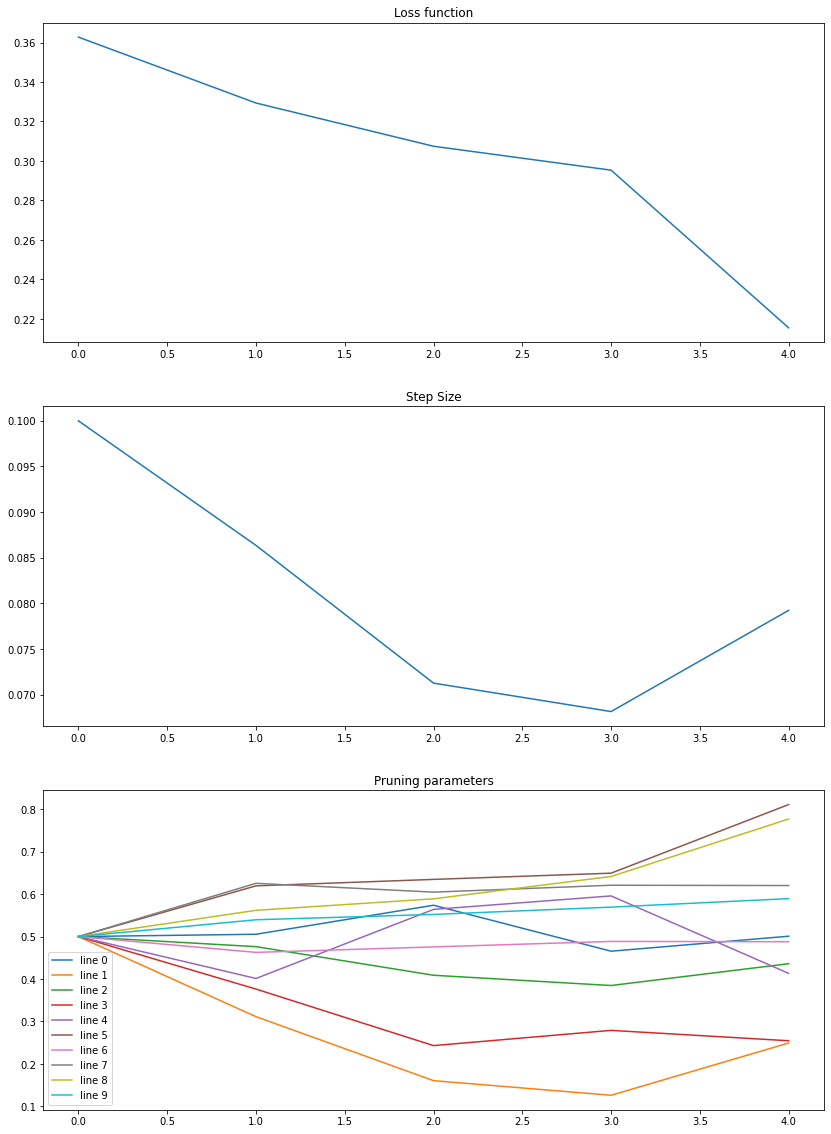

In [9]:
#visiualize the result
def plotOSResult(arr1, arr2, arr2d, model_name):
    run_num = len(arr1)
    parm_num = len(arr2d[0])
    plt.figure(figsize=(14,20))
    ax1 = plt.subplot(311)
    ax1.plot(arr1)
    ax1.set_title('Loss function')

    ax2 = plt.subplot(312)
    ax2.plot(arr2)
    ax2.set_title('Step Size')

    ax3 = plt.subplot(313)
    for line in range(parm_num):
        ax3.plot([arr2d[j][line] for j in range(run_num)], label = f'layer {line}')

    ax3.set_title('Pruning parameters')    
    ax3.legend(loc=3)   

    now=datetime.now()
    time_print=now.strftime("%Y-%m-%d %H:%M:%S")
    plt.savefig(f'./image_output/{model_name}OneStepEC_{run_num}runs_{time_print}.png',dpi = 400)
    plt.show()
    

plotOSResult(BS_reocrd,SZ_record,DV_record,"VGG11")

